In [1]:
# https://github.com/ellarauth/CCN-proxy-modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
# the measurement station codes (35 stations)
# more detailed information on the stations can be found in metadata/measurement_sites_info.txt
stations = ['ABZ', 'ALE', 'AMA', 'AMM', 'ASP', 'BEI', 'BOT', 'BSL', 'DEL', 'EGB',
            'FKL', 'HAD', 'HEL', 'HPB', 'HRW', 'HYY', 'KCE', 'KPZ', 'MAR', 'MHD', 
            'MLP', 'MUK', 'NAN', 'NEU', 'POV', 'PRL', 'SAO', 'SCH', 'SGP', 'UAE',
            'VAR', 'VHL', 'VIE', 'WAL', 'ZOT']

# list of all variables
# a full description of all variable names can be found in metadata/variable_names.txt
variables = ['aermr01', 'aermr02', 'aermr03', 'aermr04', 'aermr05', 'aermr06', 
             'aermr07', 'aermr08', 'aermr09', 'aermr10', 'aermr11', 'co', 'c5h8', 'c10h16', 
             'nh3', 'no', 'no2', 'so2', 'd2m', 't2m', 'crwc', 'blh', 'rh', 'wind_speed',
             'latitude', 'longitude']

# list of variables that should NOT be log-transformed
dont_transform = ['d2m', 't2m', 'blh', 'rh', 'latitude', 'longitude']

# list of variables with '_log' appended for variables that are log-transformed
transf_vars = []
for v in variables:    
    if v in dont_transform:
        transf_vars.append(v)
    else:
        transf_vars.append(v+'_log')
        
# loading the data
data = pd.read_csv('data/full_data.csv', parse_dates=['date'])

# log-transformed n100 values that are < 1 become negative, so they are set to 1
data.loc[data.n100 < 1, 'n100'] = 1

# log-transforming the selected variables, setting negative values to the minimum observed positive value
for v in ['n100']+variables:
    if v not in dont_transform:
        data[v+'_log'] = np.log(data[v].where(data[v] > 0, data[v][data[v] > 0].min()))
        
data.head()

,id,station,date,latitude,longitude,n100,aermr01,aermr02,aermr03,aermr04,...,aermr11_log,co_log,c5h8_log,c10h16_log,nh3_log,no_log,no2_log,so2_log,crwc_log,wind_speed_log
0,ABZ-2012-01-26 18:00:00,ABZ,2012-01-26 18:00:00,50.57,12.99,2994.733333,1.130925e-11,9.656489e-10,5.386068e-11,8.925737e-15,...,-20.412749,-15.124920,-24.916715,-23.053327,-21.067484,-20.375236,-17.606319,-19.048942,-23.530567,0.851615
1,ABZ-2012-01-26 21:00:00,ABZ,2012-01-26 21:00:00,50.57,12.99,2780.725000,1.221719e-11,1.043291e-09,4.078474e-11,1.820321e-15,...,-20.488050,-15.042628,-25.040942,-22.830160,-20.798013,-19.560968,-17.517805,-18.690249,-23.530567,0.828870
2,ABZ-2012-01-27 00:00:00,ABZ,2012-01-27 00:00:00,50.57,12.99,2098.000000,7.723116e-12,6.594735e-10,1.707053e-11,8.950445e-14,...,-20.921640,-14.867180,-25.060629,-22.337343,-20.315620,-18.490878,-17.415018,-18.248112,-23.530567,0.659509
3,ABZ-2012-01-27 03:00:00,ABZ,2012-01-27 03:00:00,50.57,12.99,1796.350000,4.699148e-12,4.011062e-10,8.261608e-12,3.943629e-13,...,-21.275614,-14.668254,-24.737945,-21.829715,-20.260121,-17.796891,-17.333992,-18.250056,-23.530567,0.463058
4,ABZ-2012-01-27 06:00:00,ABZ,2012-01-27 06:00:00,50.57,12.99,1997.300000,3.720708e-12,3.175671e-10,4.759155e-12,1.120592e-12,...,-21.398551,-14.485192,-24.141170,-21.518095,-20.694717,-17.289473,-17.435466,-18.717292,-23.530567,0.544678


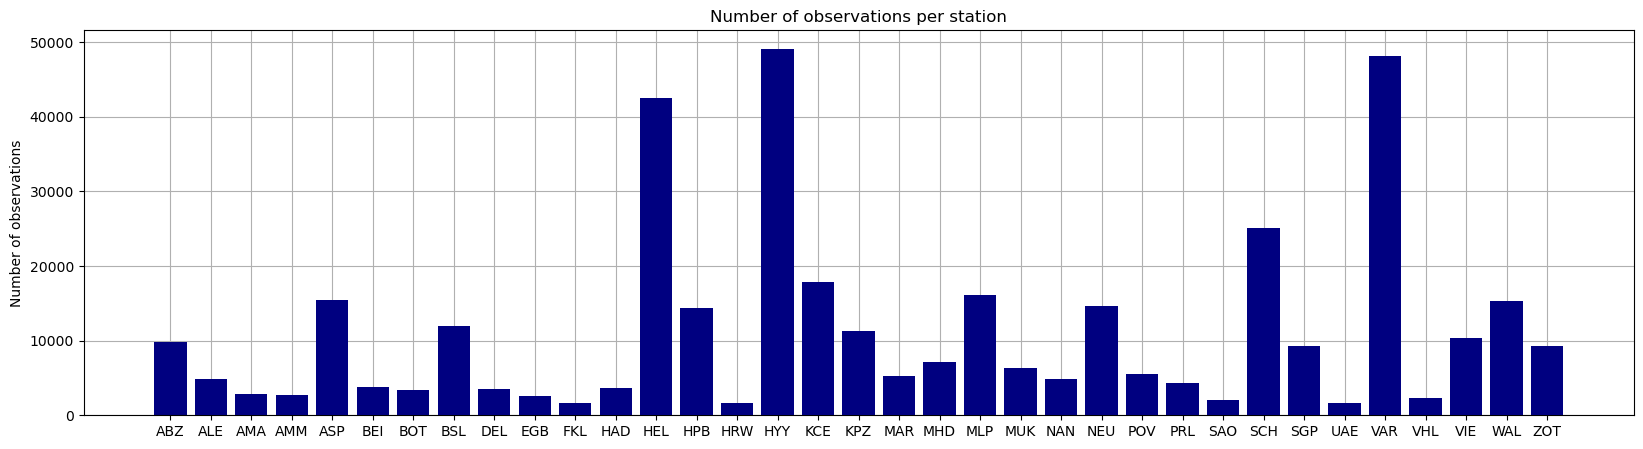

In [3]:
# plotting the number of observations per station
plt.figure(figsize=(20,5))
plt.grid(zorder=40)
i = 2
for s in stations:
    plt.bar(s, len(data.loc[data.station == s]), zorder=i, color='navy')
    i += 1

plt.ylabel('Number of observations')
plt.title('Number of observations per station');

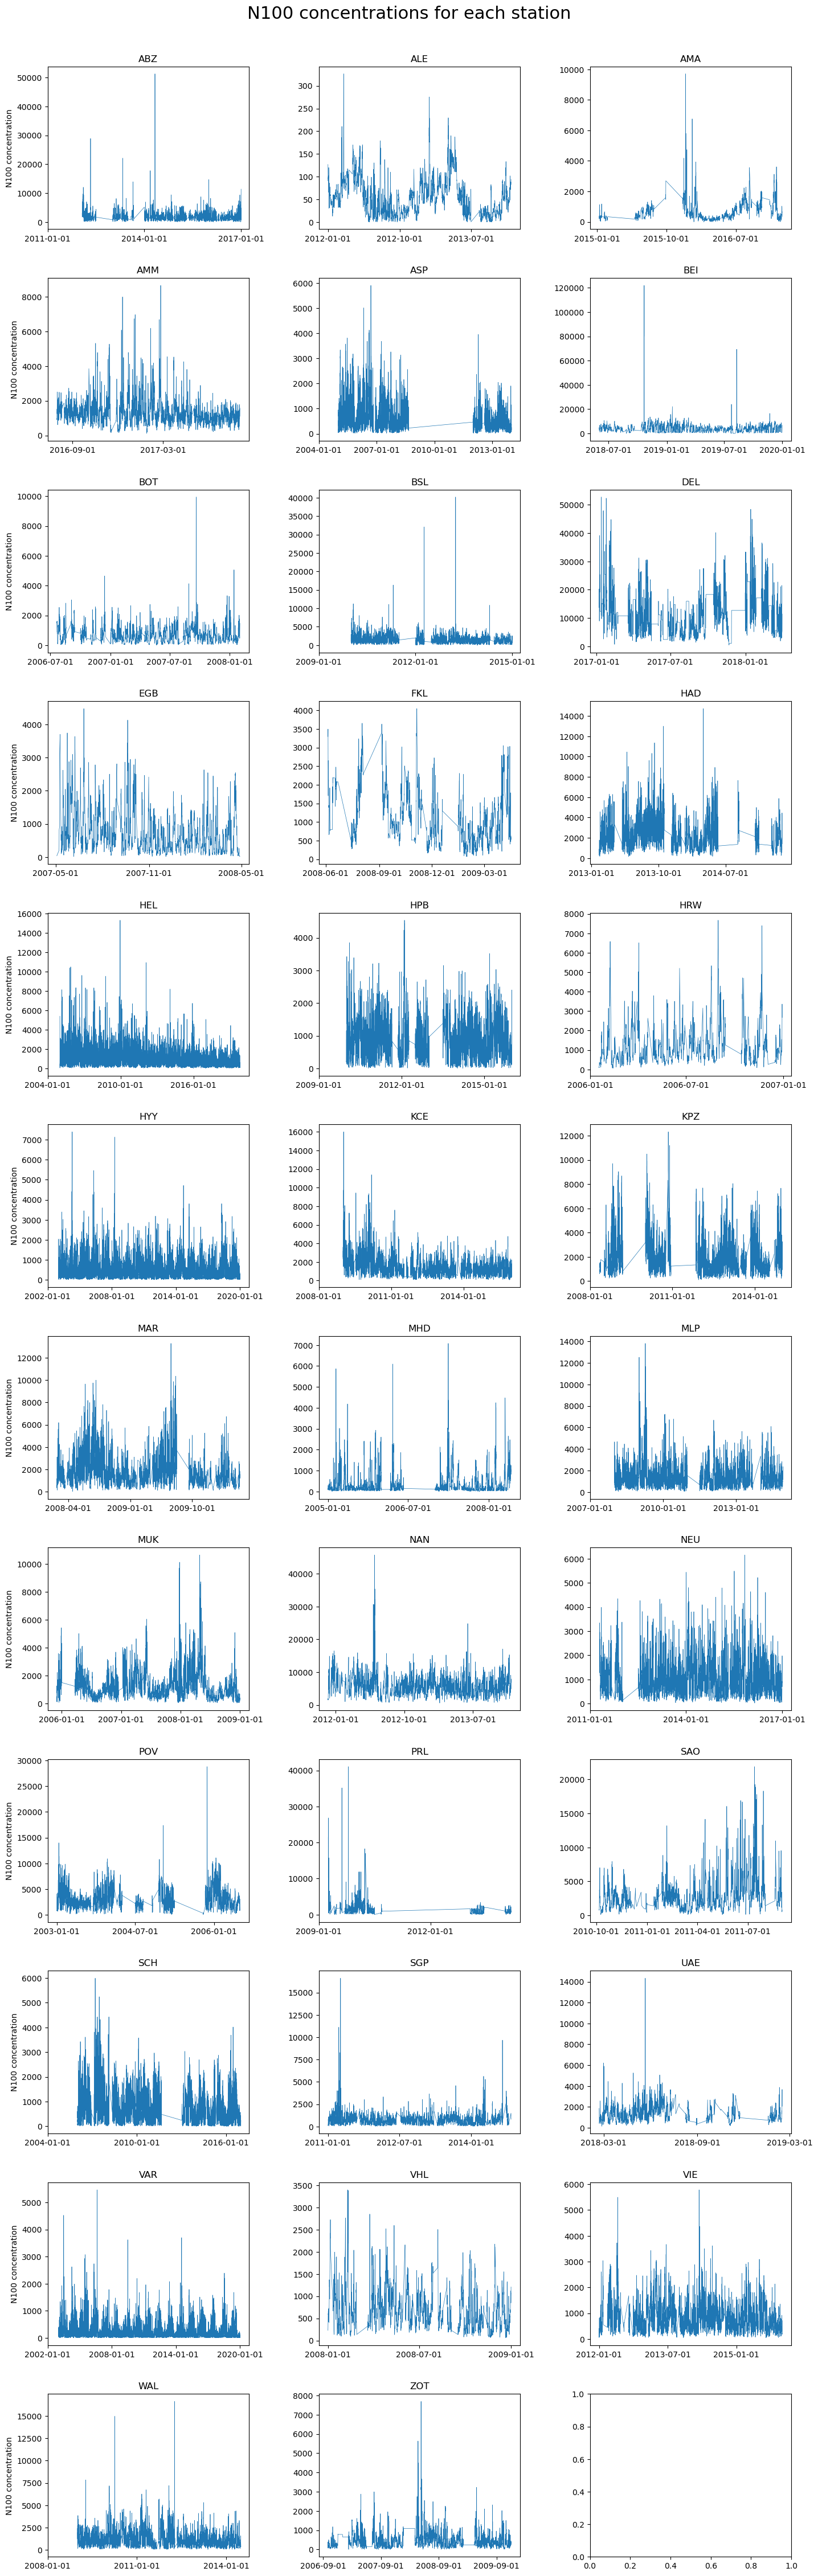

In [4]:
# plotting the n100 data for each station over time
fig, axes = plt.subplots(12, 3, figsize=(15,45))
axes = iter(axes)
i = 0

for s in stations:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.plot(data.date.loc[data.station == s], data.n100.loc[data.station == s], lw=0.5)
    ax.set_title(s)
    ax.set_xticks(ax.get_xticks()[::3])
    if i%3 == 0:
        ax.set_ylabel('N100 concentration')
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('N100 concentrations for each station', y=1.01, fontsize=22);

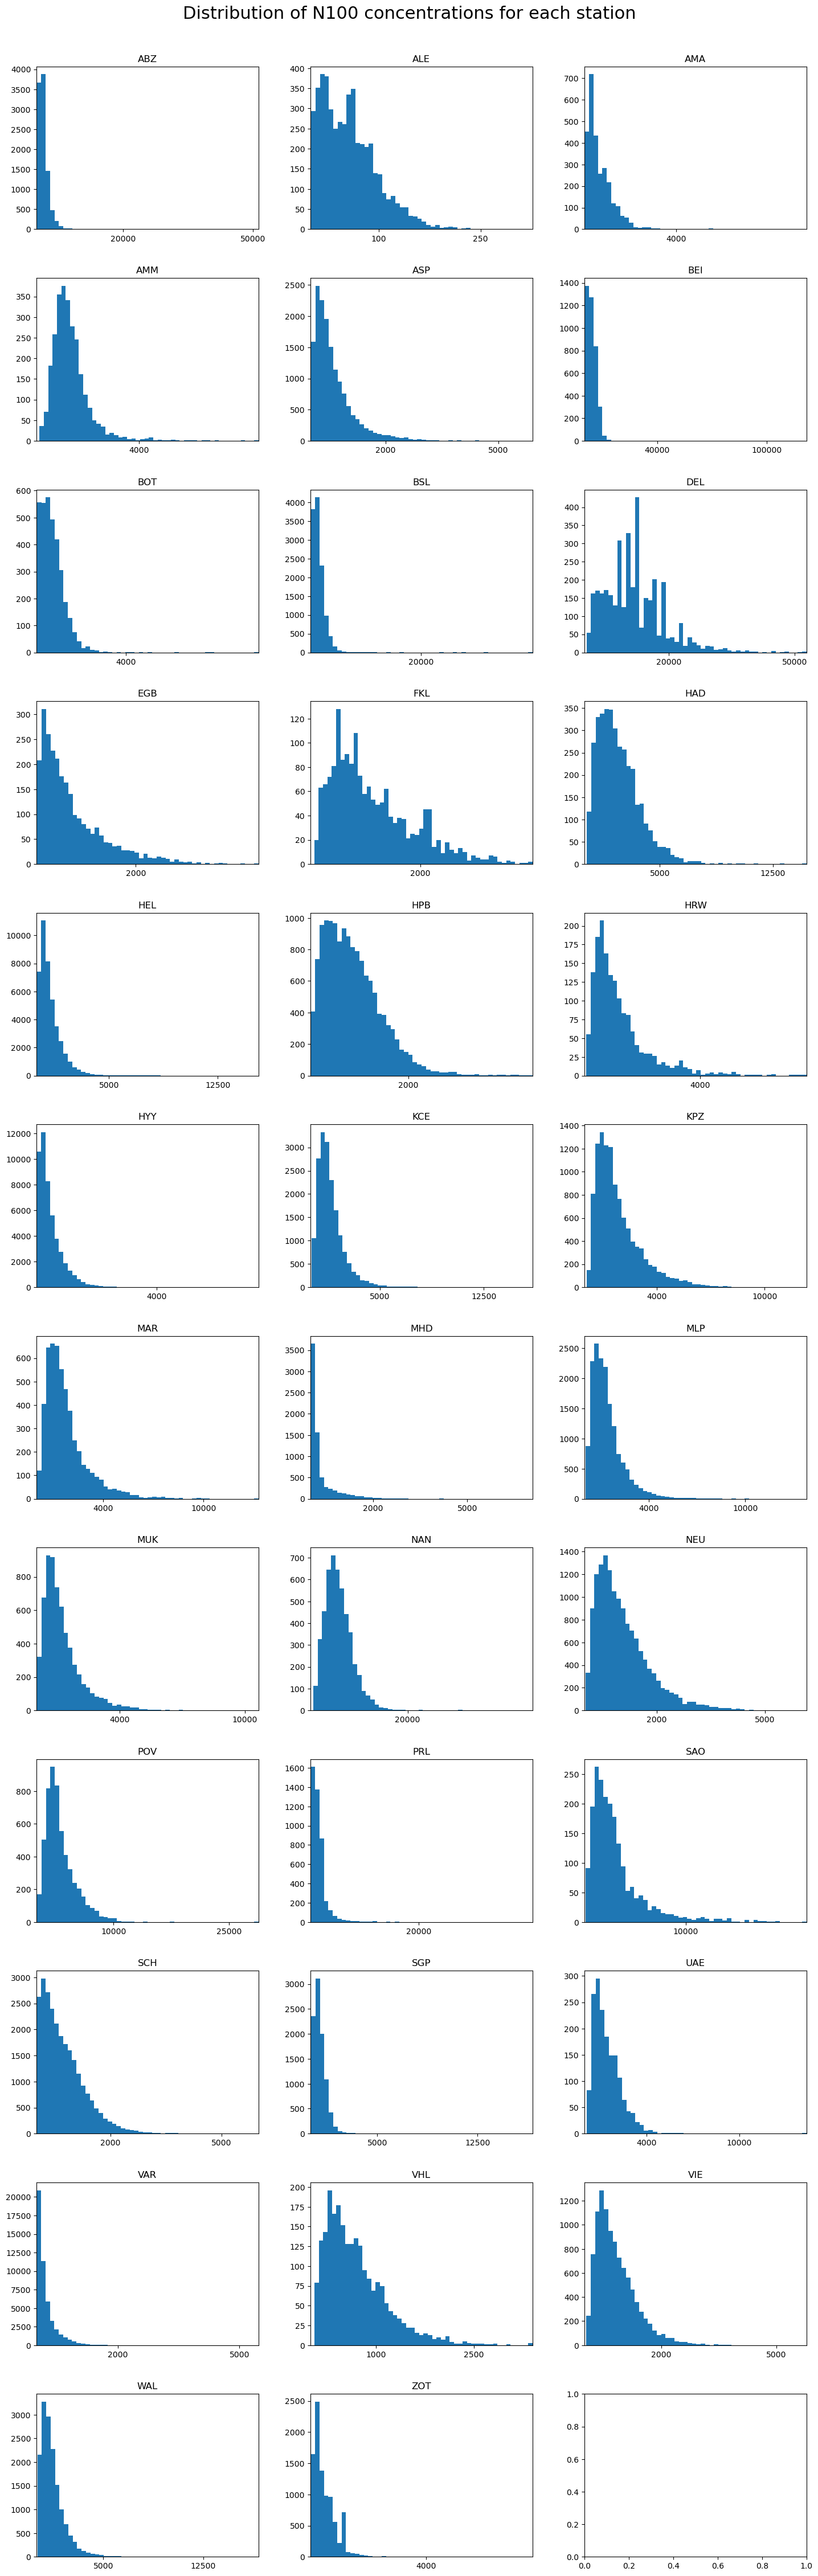

In [5]:
# plotting the distribution of n100 values for each station
fig, axes = plt.subplots(12, 3, figsize=(15, 45))
axes = iter(axes)
i = 0

for s in stations:
    if i%3 == 0:
        axis = next(axes)
    ax = axis[i%3]
    ax.hist(data.n100.loc[data.station == s], bins=50)
    ax.set_title(s)
    ax.set_xticks(ax.get_xticks()[::3])
    ax.set_xlim(0, max(data.n100.loc[data.station == s]))
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Distribution of N100 concentrations for each station', y=1.01, fontsize=22);

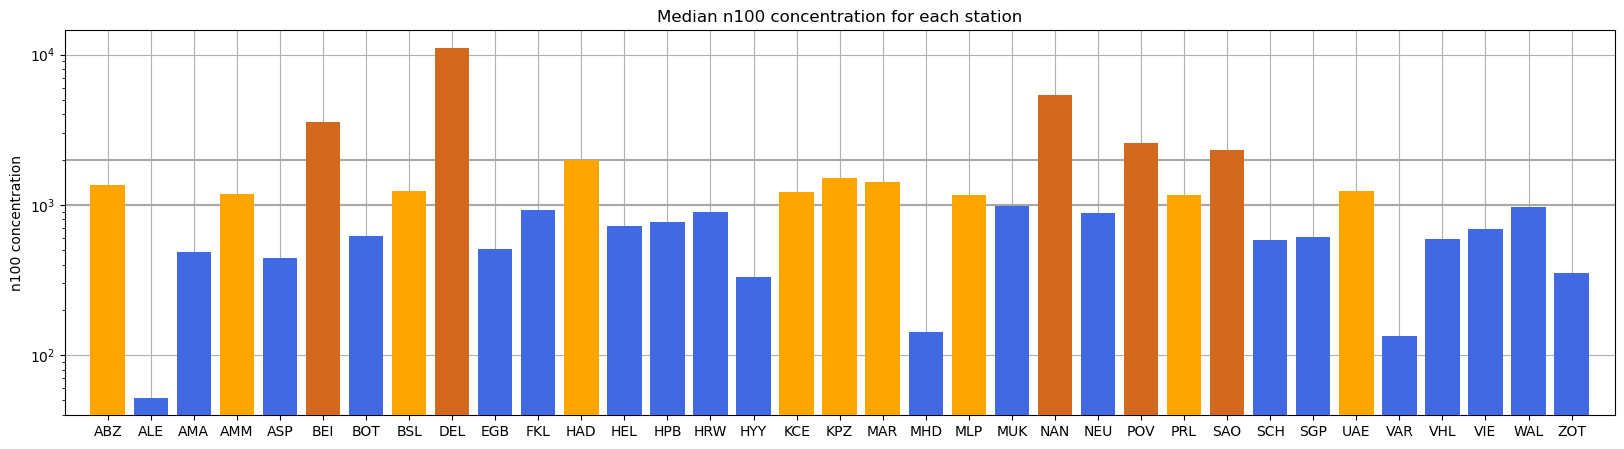

In [6]:
# plotting the median n100 concentration of each station
n100_medians = []
for s, group in data.groupby('station'):
    n100_medians.append(group.n100.median())
    
n100_medians_groups = np.where(np.array(n100_medians) > 1000, 'medium', 'low')
n100_medians_groups = np.where(np.array(n100_medians) > 2000, 'high', n100_medians_groups)
n100_medians_colors = list(map(lambda x: {'high':'chocolate', 'medium':'orange', 'low':'royalblue'}[x], 
                               n100_medians_groups))

plt.figure(figsize=(20,5))
plt.bar(stations, n100_medians, zorder=3, color=n100_medians_colors)
plt.grid(zorder=1)
plt.hlines([1000, 2000], xmin=-2, xmax=len(stations)+1, zorder=2, color='darkgrey')
plt.title('Median n100 concentration for each station')
plt.ylabel('n100 concentration')
plt.semilogy(base=10)
plt.xlim(-1, len(stations));

In [7]:
# dictionary of all variables mapping to their full names
variable_dict = {'n100': 'N100 concentration',
                 'aermr01': 'Sea salt aerosol (0.03 - 0.5 µm)\nmixing ratio',
                 'aermr02': 'Sea salt aerosol (0.5 - 5 µm)\nmixing ratio',
                 'aermr03': 'Sea salt aerosol (5 - 20 µm)\nmixing ratio',
                 'aermr04': 'Dust aerosol (0.03 - 0.55 µm)\nmixing ratio',
                 'aermr05': 'Dust aerosol (0.55 - 0.9 µm)\nmixing ratio',
                 'aermr06': 'Dust aerosol (0.9 - 20 µm)\nmixing ratio',
                 'aermr07': 'Hydrophilic organic matter\naerosol mixing ratio',
                 'aermr08': 'Hydrophobic organic matter\naerosol mixing ratio',                 
                 'aermr09': 'Hydrophilic black carbon\naerosol mixing ratio',
                 'aermr10': 'Hydrophobic black carbon\naerosol mixing ratio',
                 'aermr11': 'Sulphate aerosol mixing ratio',
                 'co': 'Carbon monoxide',
                 'c5h8': 'Isoprene',
                 'c10h16': 'Terpenes',
                 'nh3': 'Ammonia',
                 'no': 'Nitrogen monoxide',
                 'no2': 'Nitrogen dioxide',
                 'so2': 'Sulphur dioxide',
                 'd2m': 'Dew point temperature\nat 2m height',
                 't2m': 'Air temperature\nat 2m height',
                 'crwc': 'Specific rain water content',
                 'blh': 'Boundary layer height',
                 'rh': 'Relative humidity',
                 'wind_speed': 'Wind speed',
                 'doy_sin': 'Sine of the day of the year',
                 'doy_cos': 'Cosine of the day of the year',
                 'latitude': 'Latitude',
                 'longitude': 'Longitude'}

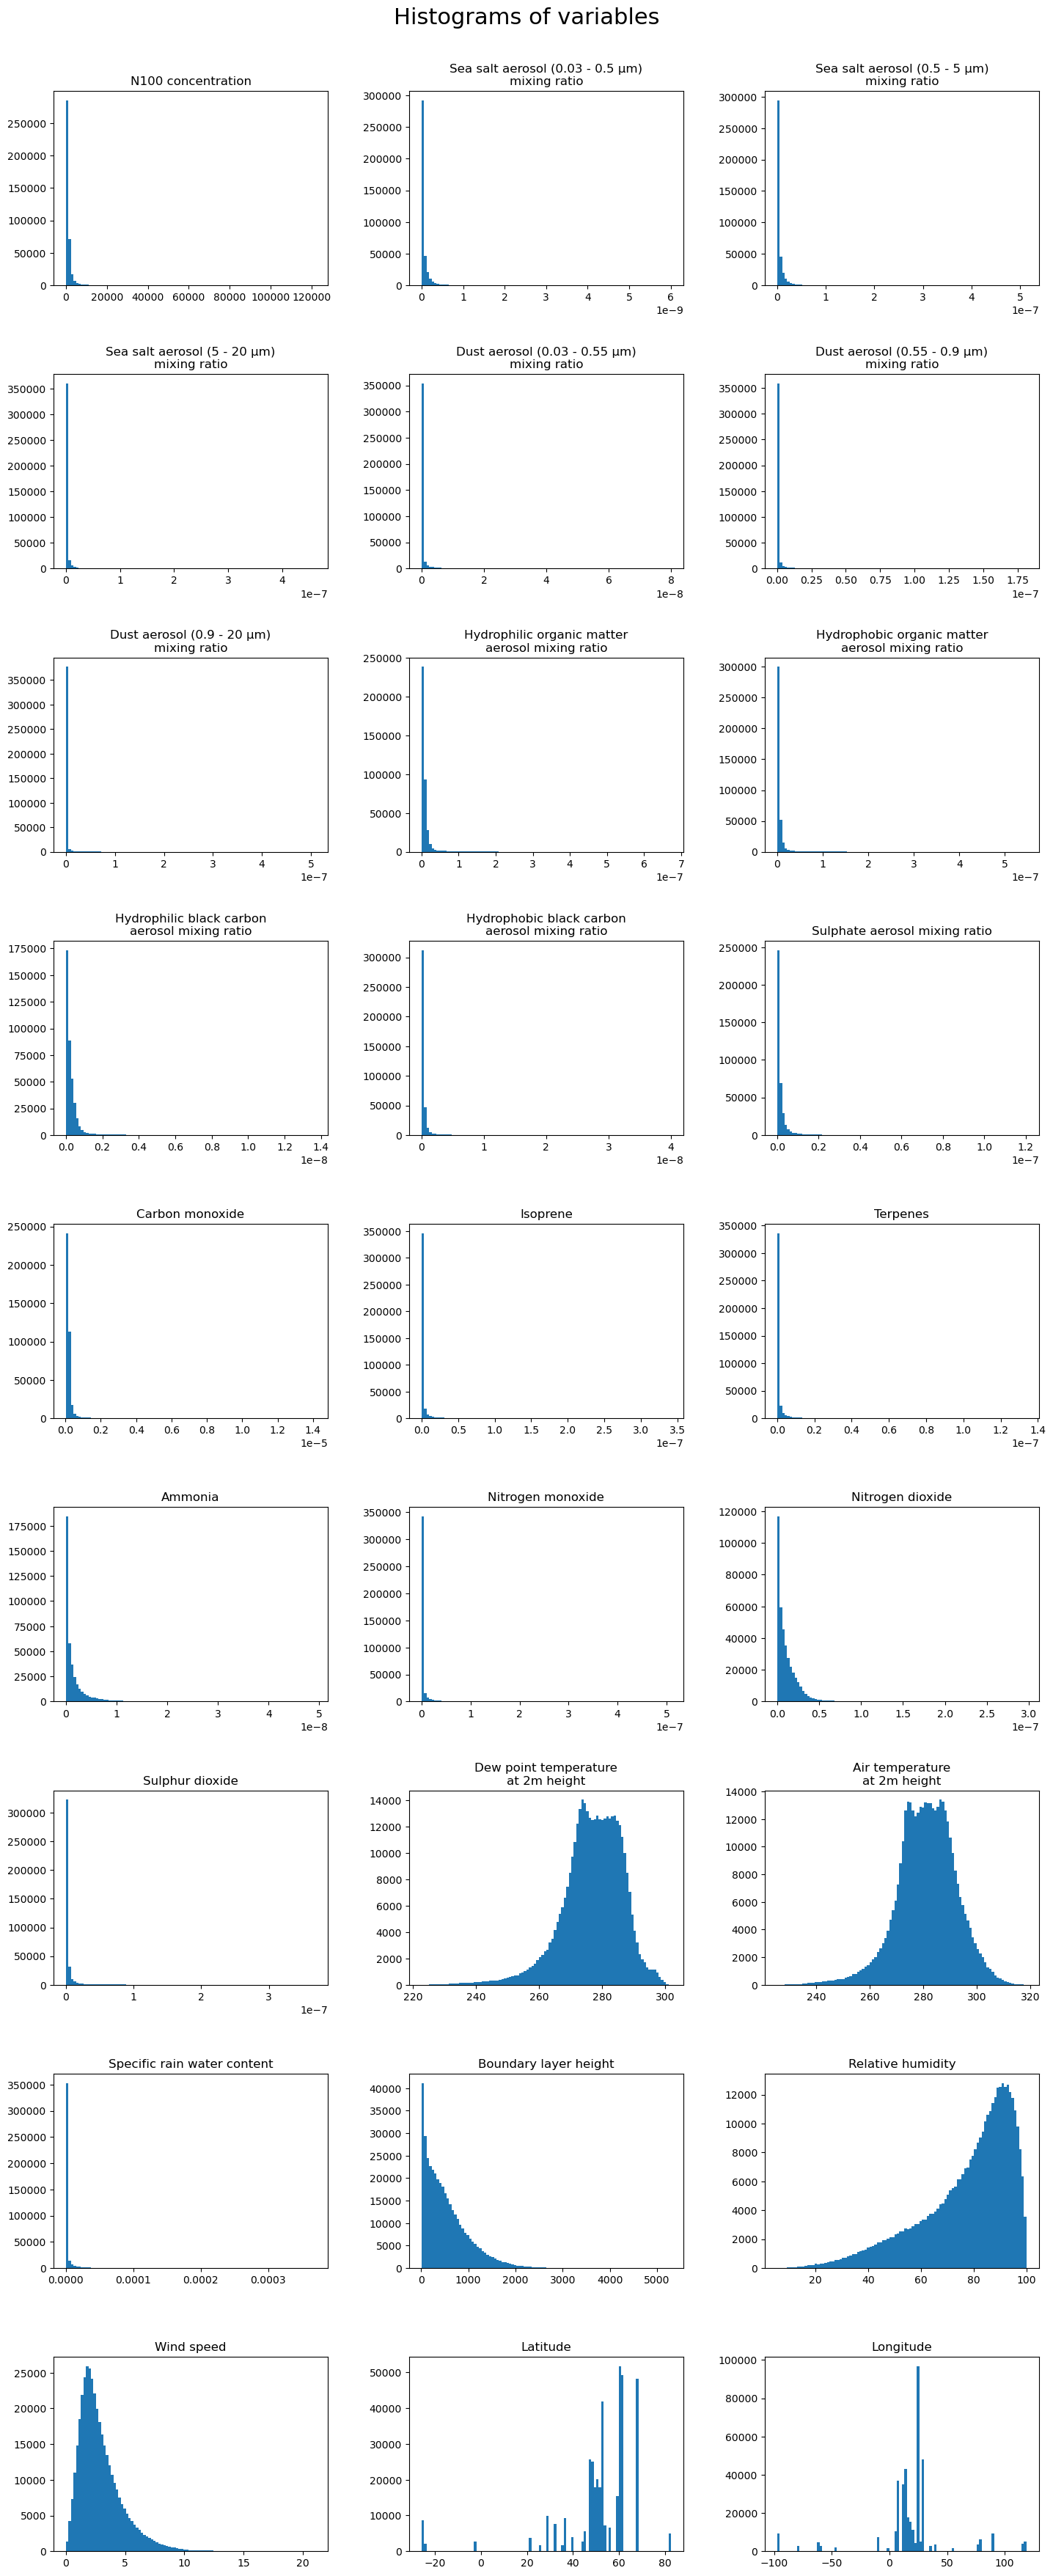

In [8]:
# plotting the distributions of n100 and all variables (not log-transformed)
ncols = 3
fig, axes = plt.subplots(9, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100']+variables:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables', y=1.01, fontsize=22);

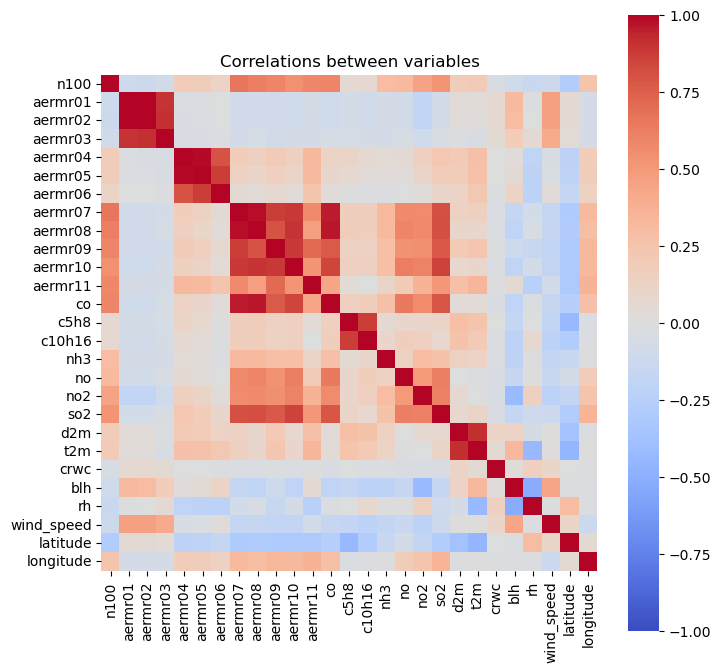

In [9]:
# plotting the correlations between the variables (not log-transformed)
plt.figure(figsize=(8, 8))
sns.heatmap(data[['n100']+variables].corr(), vmin=-1, vmax=1, xticklabels=['n100']+variables, 
            yticklabels=['n100']+variables, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlations between variables');

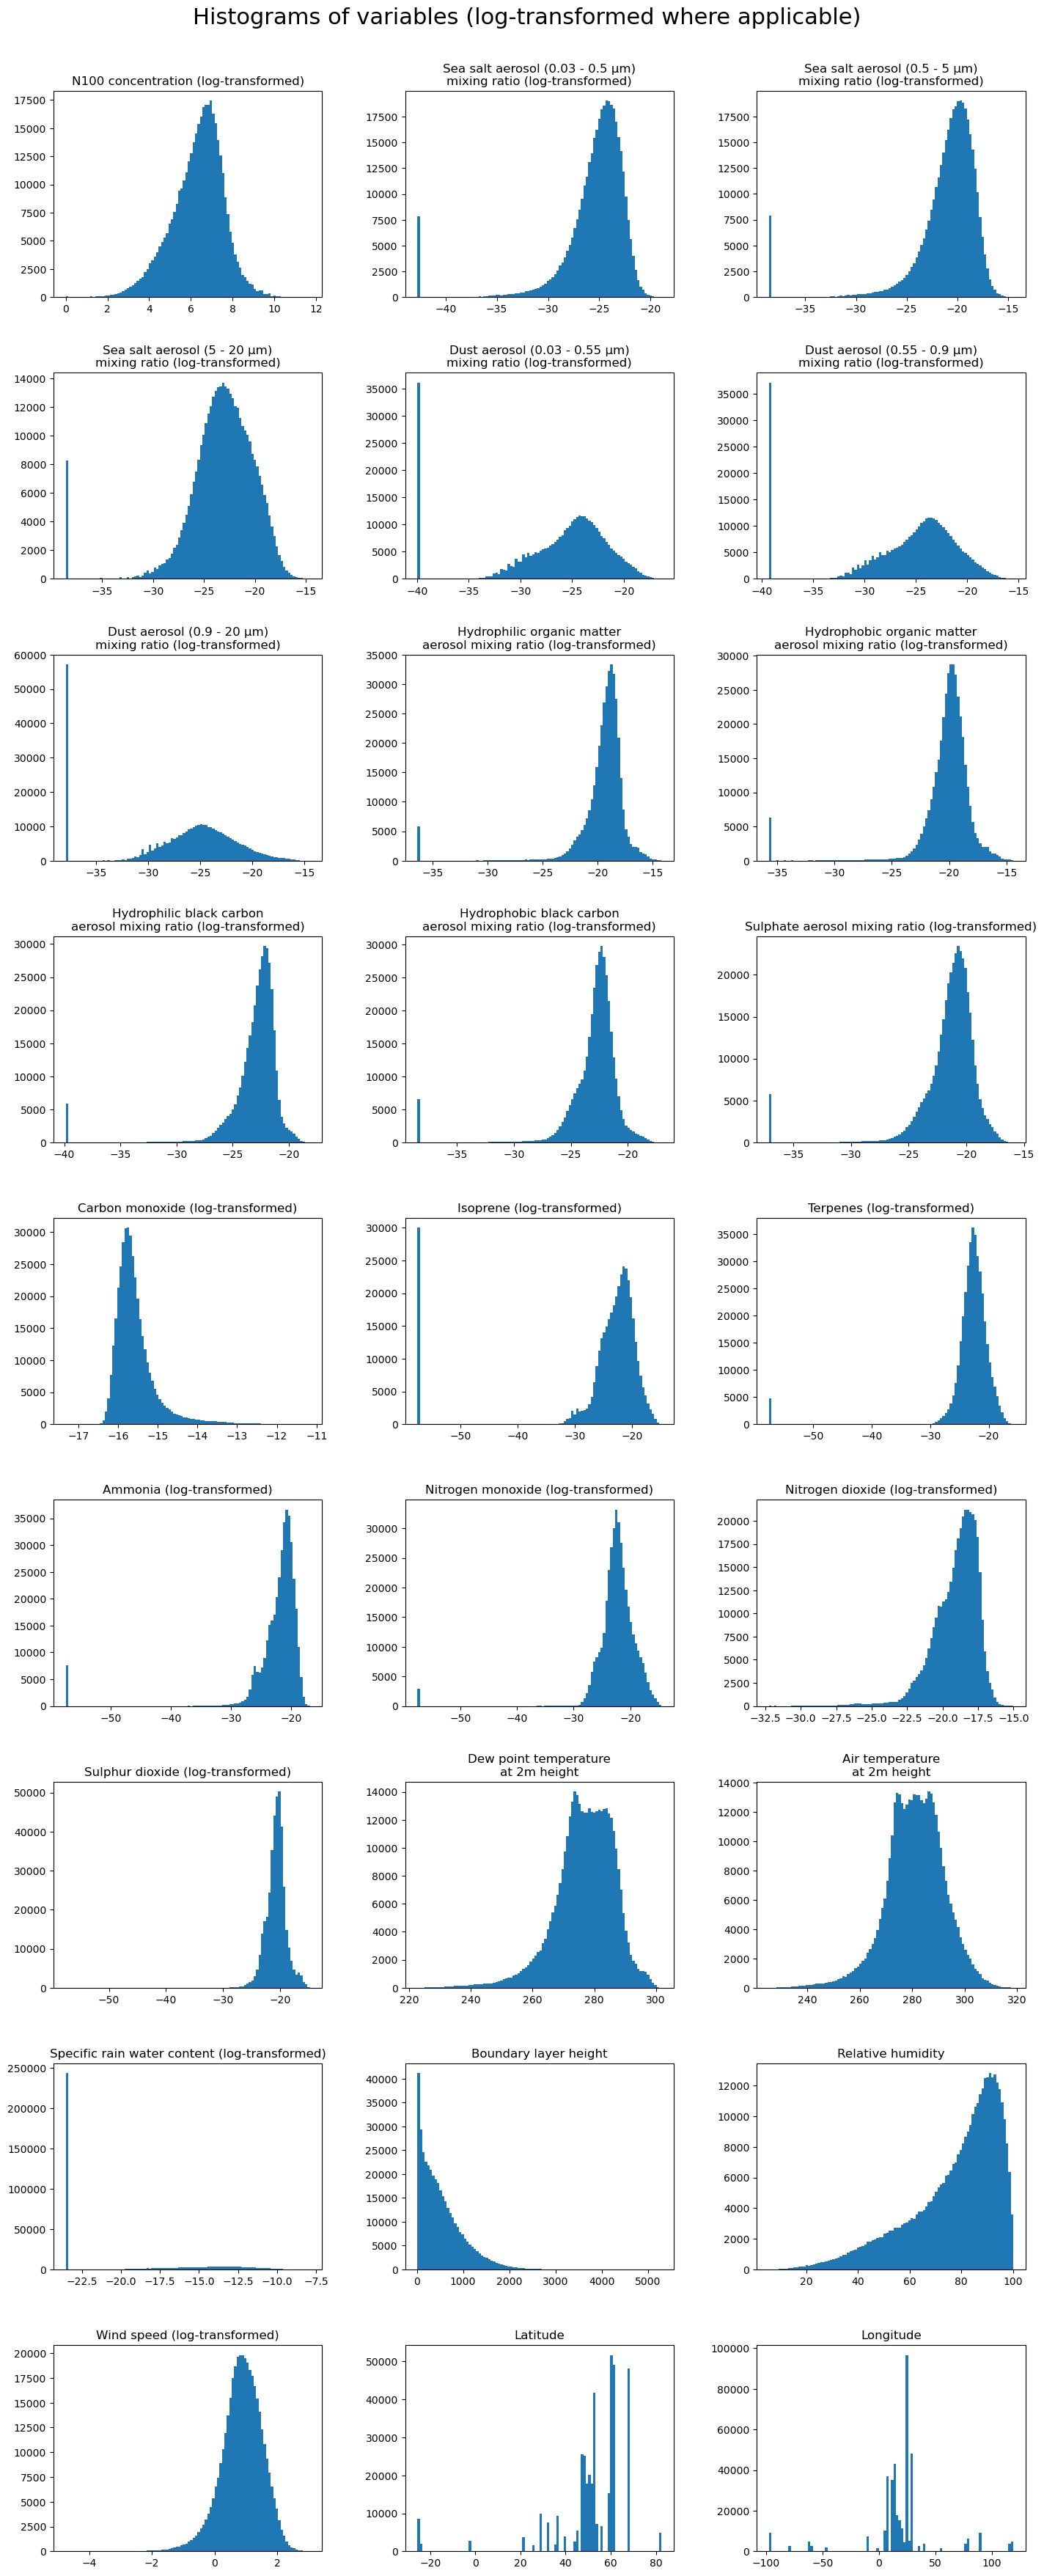

In [10]:
# plotting the distributions of n100 and all variables (log-transformed where applicable)
ncols = 3
fig, axes = plt.subplots(9, ncols, figsize=(15, 35))
axes = iter(axes)
i = 0

for v in ['n100_log']+transf_vars:
    if i%ncols == 0:
        axis = next(axes)
    ax = axis[i%ncols]
    ax.hist(data[v], bins=100)
    if v[-3:] == 'log':
        ax.set_title(variable_dict[v[:-4]] +' (log-transformed)')
    else:
        ax.set_title(variable_dict[v])
    i += 1
    
fig.tight_layout(pad=3)
fig.suptitle('Histograms of variables (log-transformed where applicable)', y=1.01, fontsize=22);

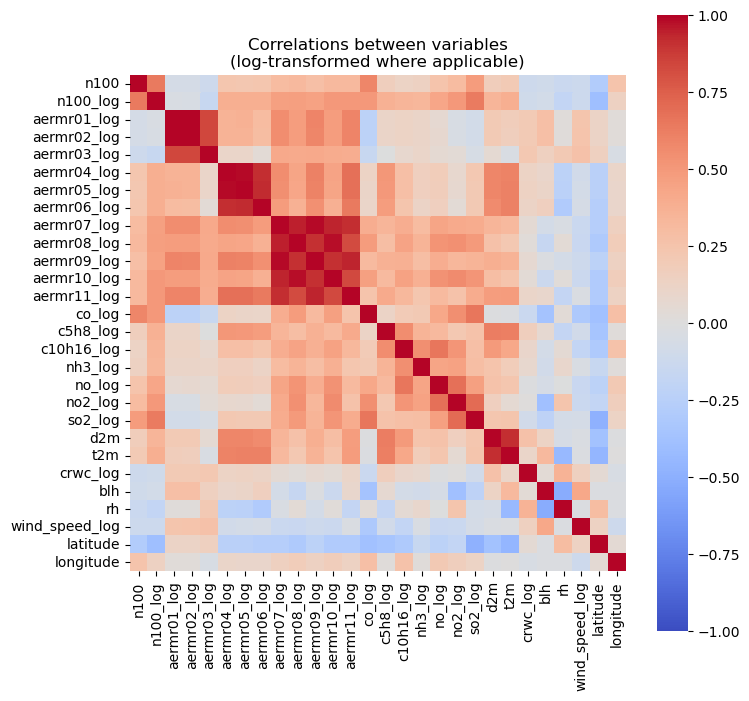

In [11]:
# plotting the correlations between the variables (log-transformed where applicable)
plt.figure(figsize=(8, 8))        
sns.heatmap(data[['n100', 'n100_log']+transf_vars].corr(), 
            xticklabels=['n100', 'n100_log']+transf_vars, yticklabels=['n100', 'n100_log']+transf_vars, 
            cmap='coolwarm', cbar=True, square=True, vmin=-1, vmax=1)
plt.title('Correlations between variables\n(log-transformed where applicable)');

In [12]:
print('Strongest correlations of variables with N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with N100 (before and after log-transforming):
aermr01         -0.117 	  -0.063
aermr02         -0.117 	  -0.065
aermr03         -0.089 	  -0.115  	corr higher with transformed data
aermr04          0.192 	   0.237  	corr higher with transformed data
aermr05          0.175 	   0.232  	corr higher with transformed data
aermr06          0.124 	   0.238  	corr higher with transformed data
aermr07          0.658 	   0.308
aermr08          0.618 	   0.327
aermr09          0.594 	   0.284
aermr10          0.542 	   0.323
aermr11          0.583 	   0.322
co               0.595 	   0.59
c5h8             0.066 	   0.168  	corr higher with transformed data
c10h16           0.065 	   0.129  	corr higher with transformed data
nh3              0.308 	   0.142
no               0.317 	   0.257
no2              0.446 	   0.308
so2              0.525 	   0.49
d2m              0.173
t2m              0.209
crwc            -0.046 	  -0.112  	corr higher with transformed

In [13]:
print('Strongest correlations of variables with log-transformed N100 (before and after log-transforming):')

for v in variables:
    corr = np.round(pearsonr(data[v], data.n100_log), 3)
    extra_space = int(corr[0] >= 0)
    offset = 14 - len(v) + extra_space
    
    if v+'_log' in data.columns:
        transf_corr = np.round(pearsonr(data[v+'_log'], data.n100_log), 3)
        if np.abs(transf_corr[0]) > np.abs(corr[0]):
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0], 
                  ' \tcorr higher with transformed data')
        else:
            print(v, ' '*offset, corr[0], '\t', ' '*extra_space, transf_corr[0])
    else:
        print(v, ' '*offset, corr[0])

Strongest correlations of variables with log-transformed N100 (before and after log-transforming):
aermr01         -0.196 	  -0.038
aermr02         -0.198 	  -0.04
aermr03         -0.186 	  -0.149
aermr04          0.18 	   0.388  	corr higher with transformed data
aermr05          0.168 	   0.384  	corr higher with transformed data
aermr06          0.121 	   0.391  	corr higher with transformed data
aermr07          0.389 	   0.464  	corr higher with transformed data
aermr08          0.345 	   0.476  	corr higher with transformed data
aermr09          0.451 	   0.46  	corr higher with transformed data
aermr10          0.361 	   0.502  	corr higher with transformed data
aermr11          0.431 	   0.501  	corr higher with transformed data
co               0.326 	   0.504  	corr higher with transformed data
c5h8             0.104 	   0.372  	corr higher with transformed data
c10h16           0.115 	   0.344  	corr higher with transformed data
nh3              0.385 	   0.338
no           